<a href="https://colab.research.google.com/github/MatteusStranger/recomendation_system_machine_learning/blob/master/filmes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

uri_filmes = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri_filmes)


filmes.columns = ['filme_id','titulo','generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [2]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes,generos],axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [4]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(f'Grupos: {modelo.labels_}')

Grupos: [2 2 1 ... 1 2 1]


In [5]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995  0.39603158 -0.19609086 -0.23588233 -0.2620159  -0.56500755
   0.88202104 -0.2133947   0.08048379 -0.16470503  0.28469895  0.4171952
  -0.04088214 -0.17673583  0.64450821 -0.3151232   0.08961556  1.4575919
  -0.11878111 -0.06983004]
 [ 0.03650985 -0.2995086  -0.28712799 -0.2408806  -0.18615232  0.23122777
  -0.27308336  0.13097869  0.10311034 -0.17732097 -0.08963294 -0.10982377
  -0.11000134  0.01681618 -0.21753667  0.1878704  -0.17110395 -0.48664564
   0.06220896  0.0392784 ]
 [-0.05917995  0.63961396  1.60523946  1.46967097  1.2731349  -0.04706926
  -0.31442216 -0.21043389 -0.5938005   1.0664799  -0.09492563 -0.23410614
   0.55598013  0.23030415 -0.15034787 -0.28626329  0.60082454 -0.36352833
  -

In [6]:
grupos = pd.DataFrame(modelo.cluster_centers_,columns=generos.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b82621438>,
      dtype=object)

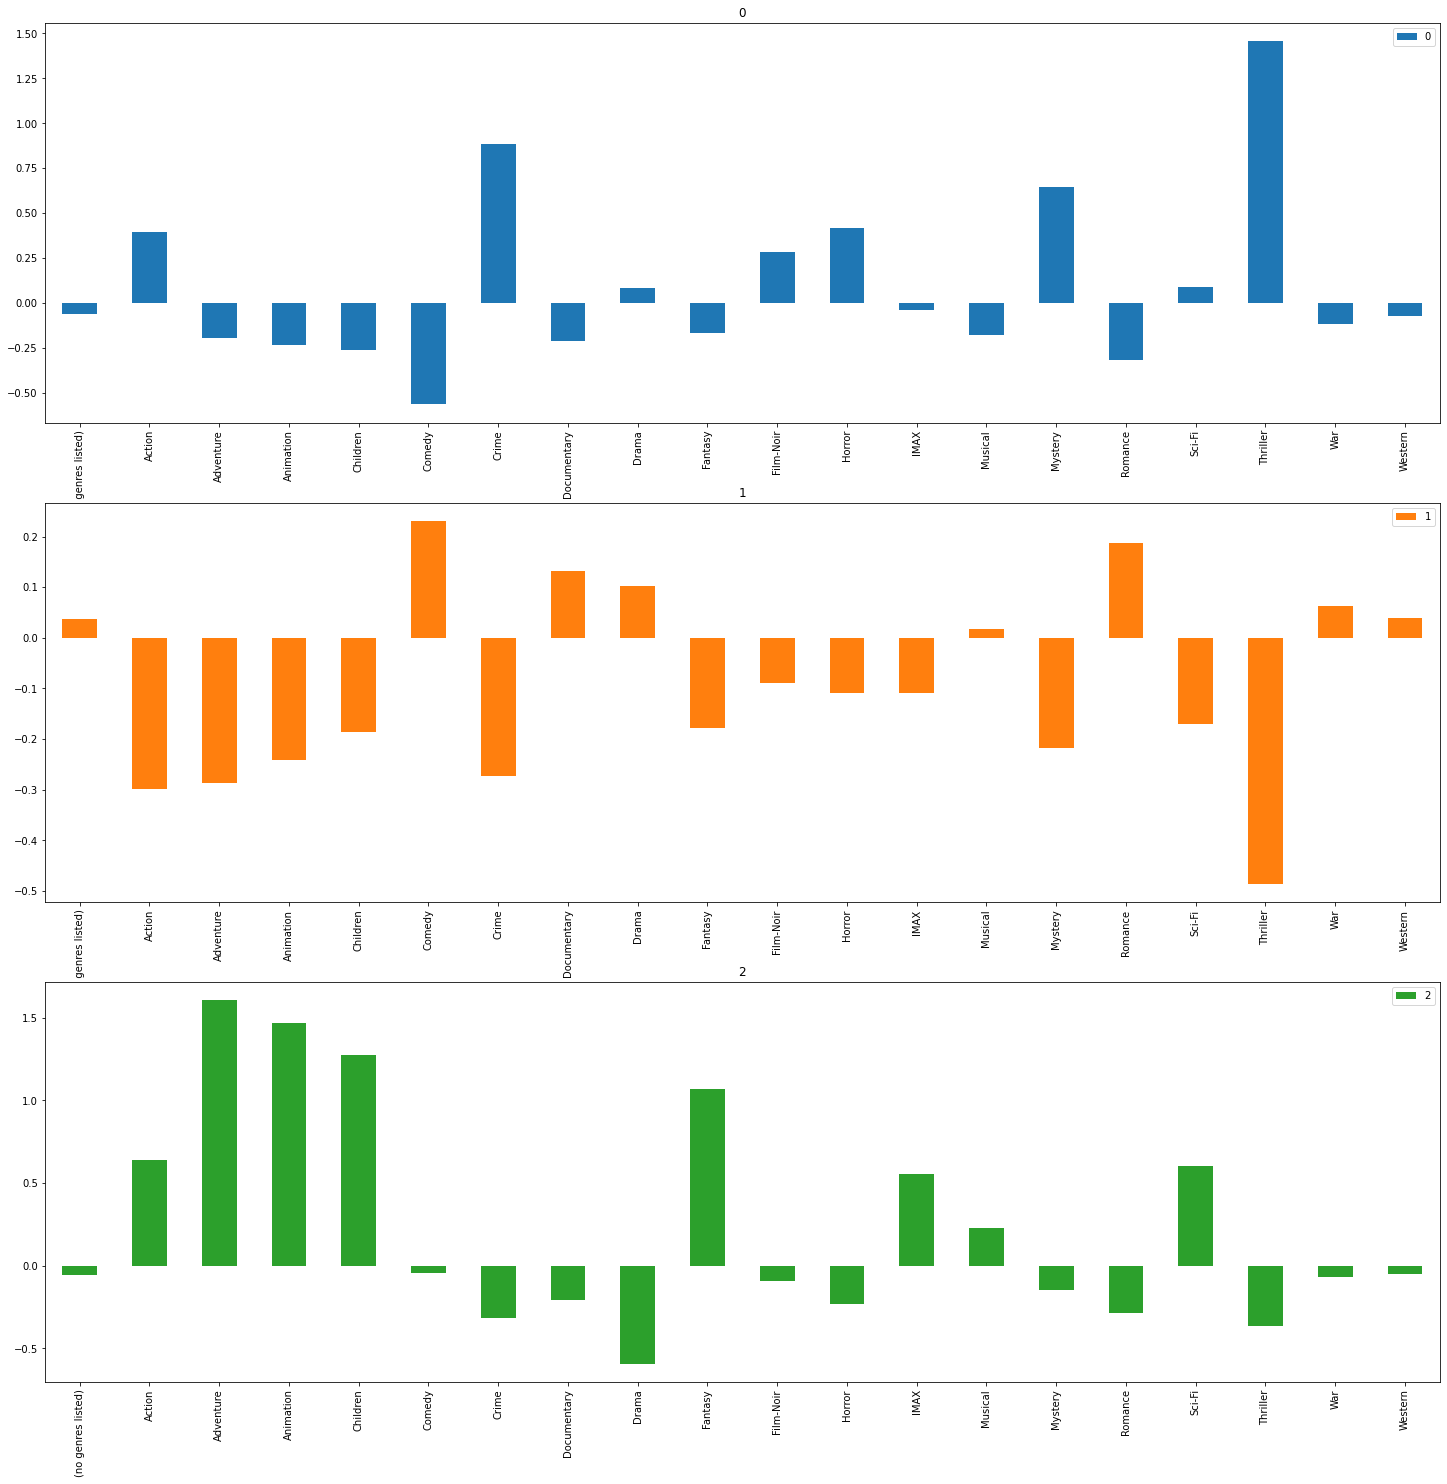

In [7]:
grupos.transpose().plot.bar(subplots=True,figsize=(25,25),sharex=False)

In [8]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
112,132,Jade (1995),Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1615,2159,Henry: Portrait of a Serial Killer (1986),Crime|Horror|Thriller,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0
6333,48872,13 Tzameti (2005),Film-Noir|Thriller,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
499,579,"Escort, The (Scorta, La) (1993)",Crime|Thriller,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3966,5590,"Mack, The (1973)",Crime,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3901,5479,K-19: The Widowmaker (2002),Action|Adventure|Drama|Thriller,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6843,61465,Bangkok Dangerous (2008),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
7726,90524,Abduction (2011),Action|Drama|Mystery|Thriller,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
4668,6973,Final Analysis (1992),Drama|Romance|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
8928,136018,Black Mass (2015),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.manifold import TSNE
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


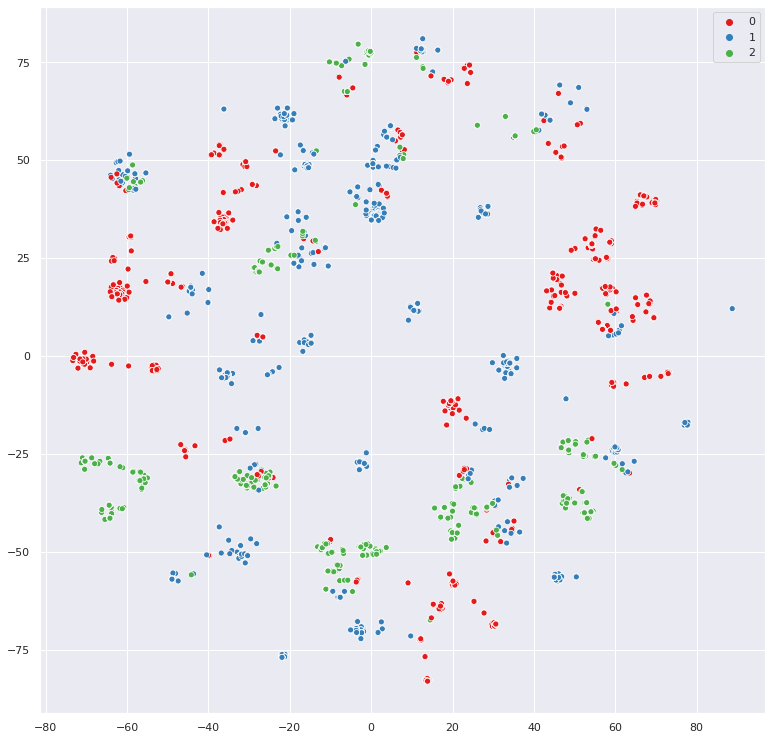

In [10]:
import seaborn as sns
sns.set(rc={'figure.figsize':(13,13)})
sns.scatterplot(x=visualizacao[:,0],y=visualizacao[:,1],hue=modelo.labels_,
                palette=sns.color_palette('Set1',3))

In [11]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b81f27cf8>,
      dtype=object)

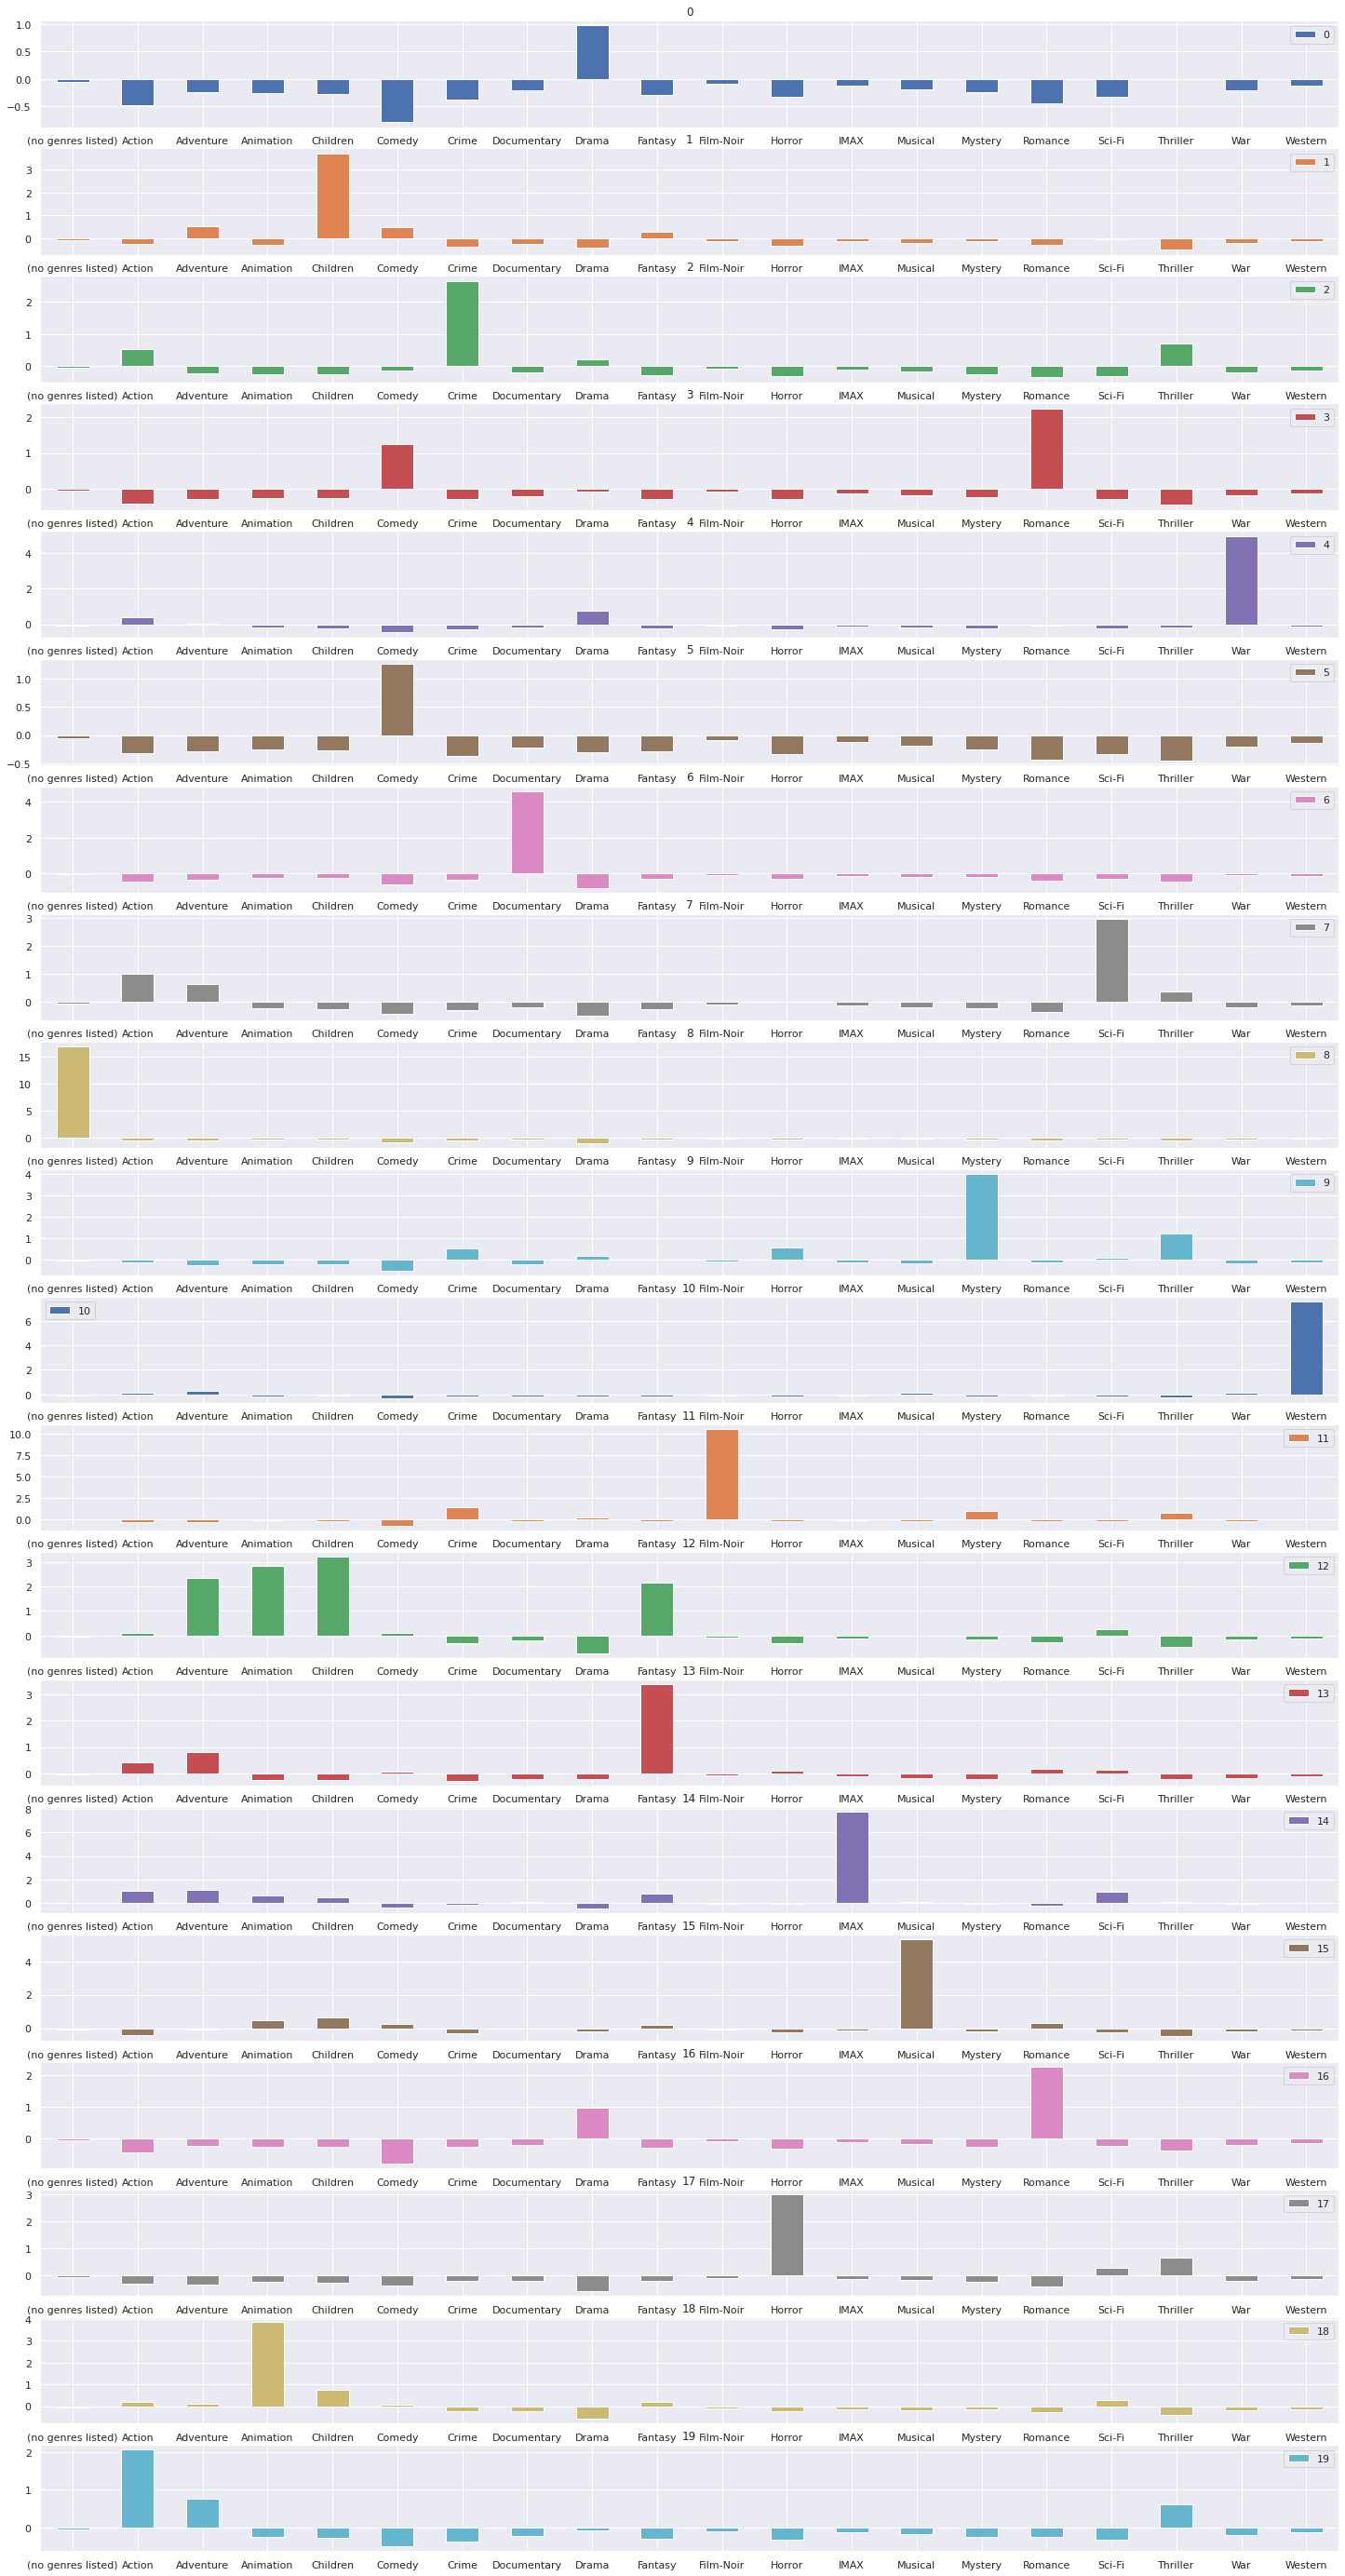

In [12]:
grupos = pd.DataFrame(modelo.cluster_centers_,columns=generos.columns)
grupos.transpose().plot.bar(subplots=True,figsize=(25,50),
                            sharex=False,
                            rot=0)

In [13]:
grupo = 2
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
9330,160527,Sympathy for the Underdog (1971),Action|Crime|Drama,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
2815,3763,F/X (1986),Action|Crime|Thriller,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3443,4695,Who'll Stop the Rain (1978),Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3016,4034,Traffic (2000),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
4103,5880,Extreme Ops (2002),Action|Adventure|Crime|Thriller,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4921,7377,"United States of Leland, The (2003)",Crime|Drama,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1630,2176,Rope (1948),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
672,886,Bulletproof (1996),Action|Comedy|Crime,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
8057,99005,Fire with Fire (2012),Action|Crime|Drama,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1032,1344,Cape Fear (1962),Crime|Drama|Thriller,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0


In [14]:
def kmeans(numero_de_clusters,generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return[numero_de_clusters,modelo.inertia_]

In [15]:
resultado = [kmeans(numero_de_grupos,generos_escalados) for numero_de_grupos in range(1,41)]

In [16]:
resultado = pd.DataFrame(resultado,columns=['grupos','inertia'])

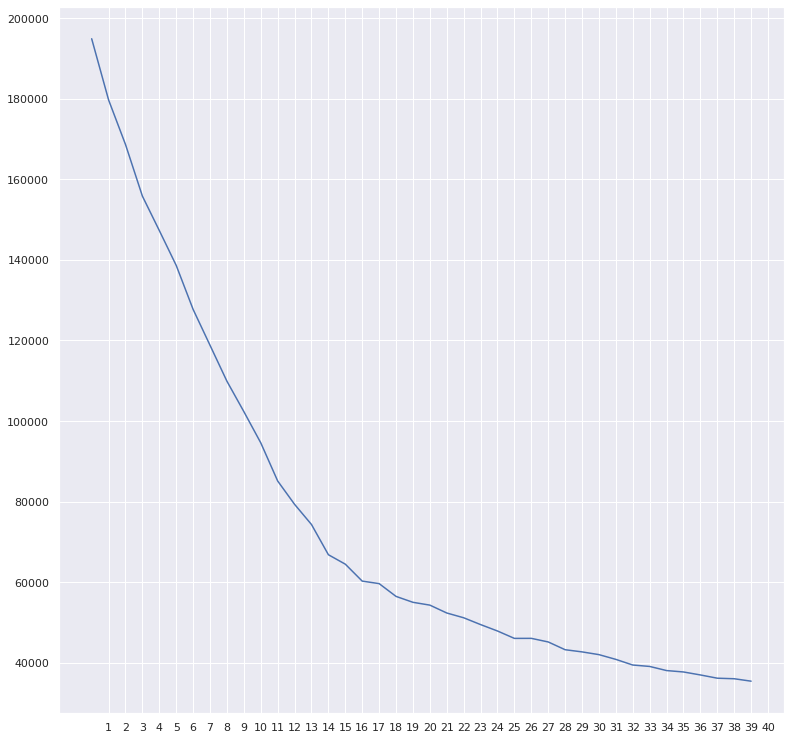

In [17]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b7e4d2be0>,
      dtype=object)

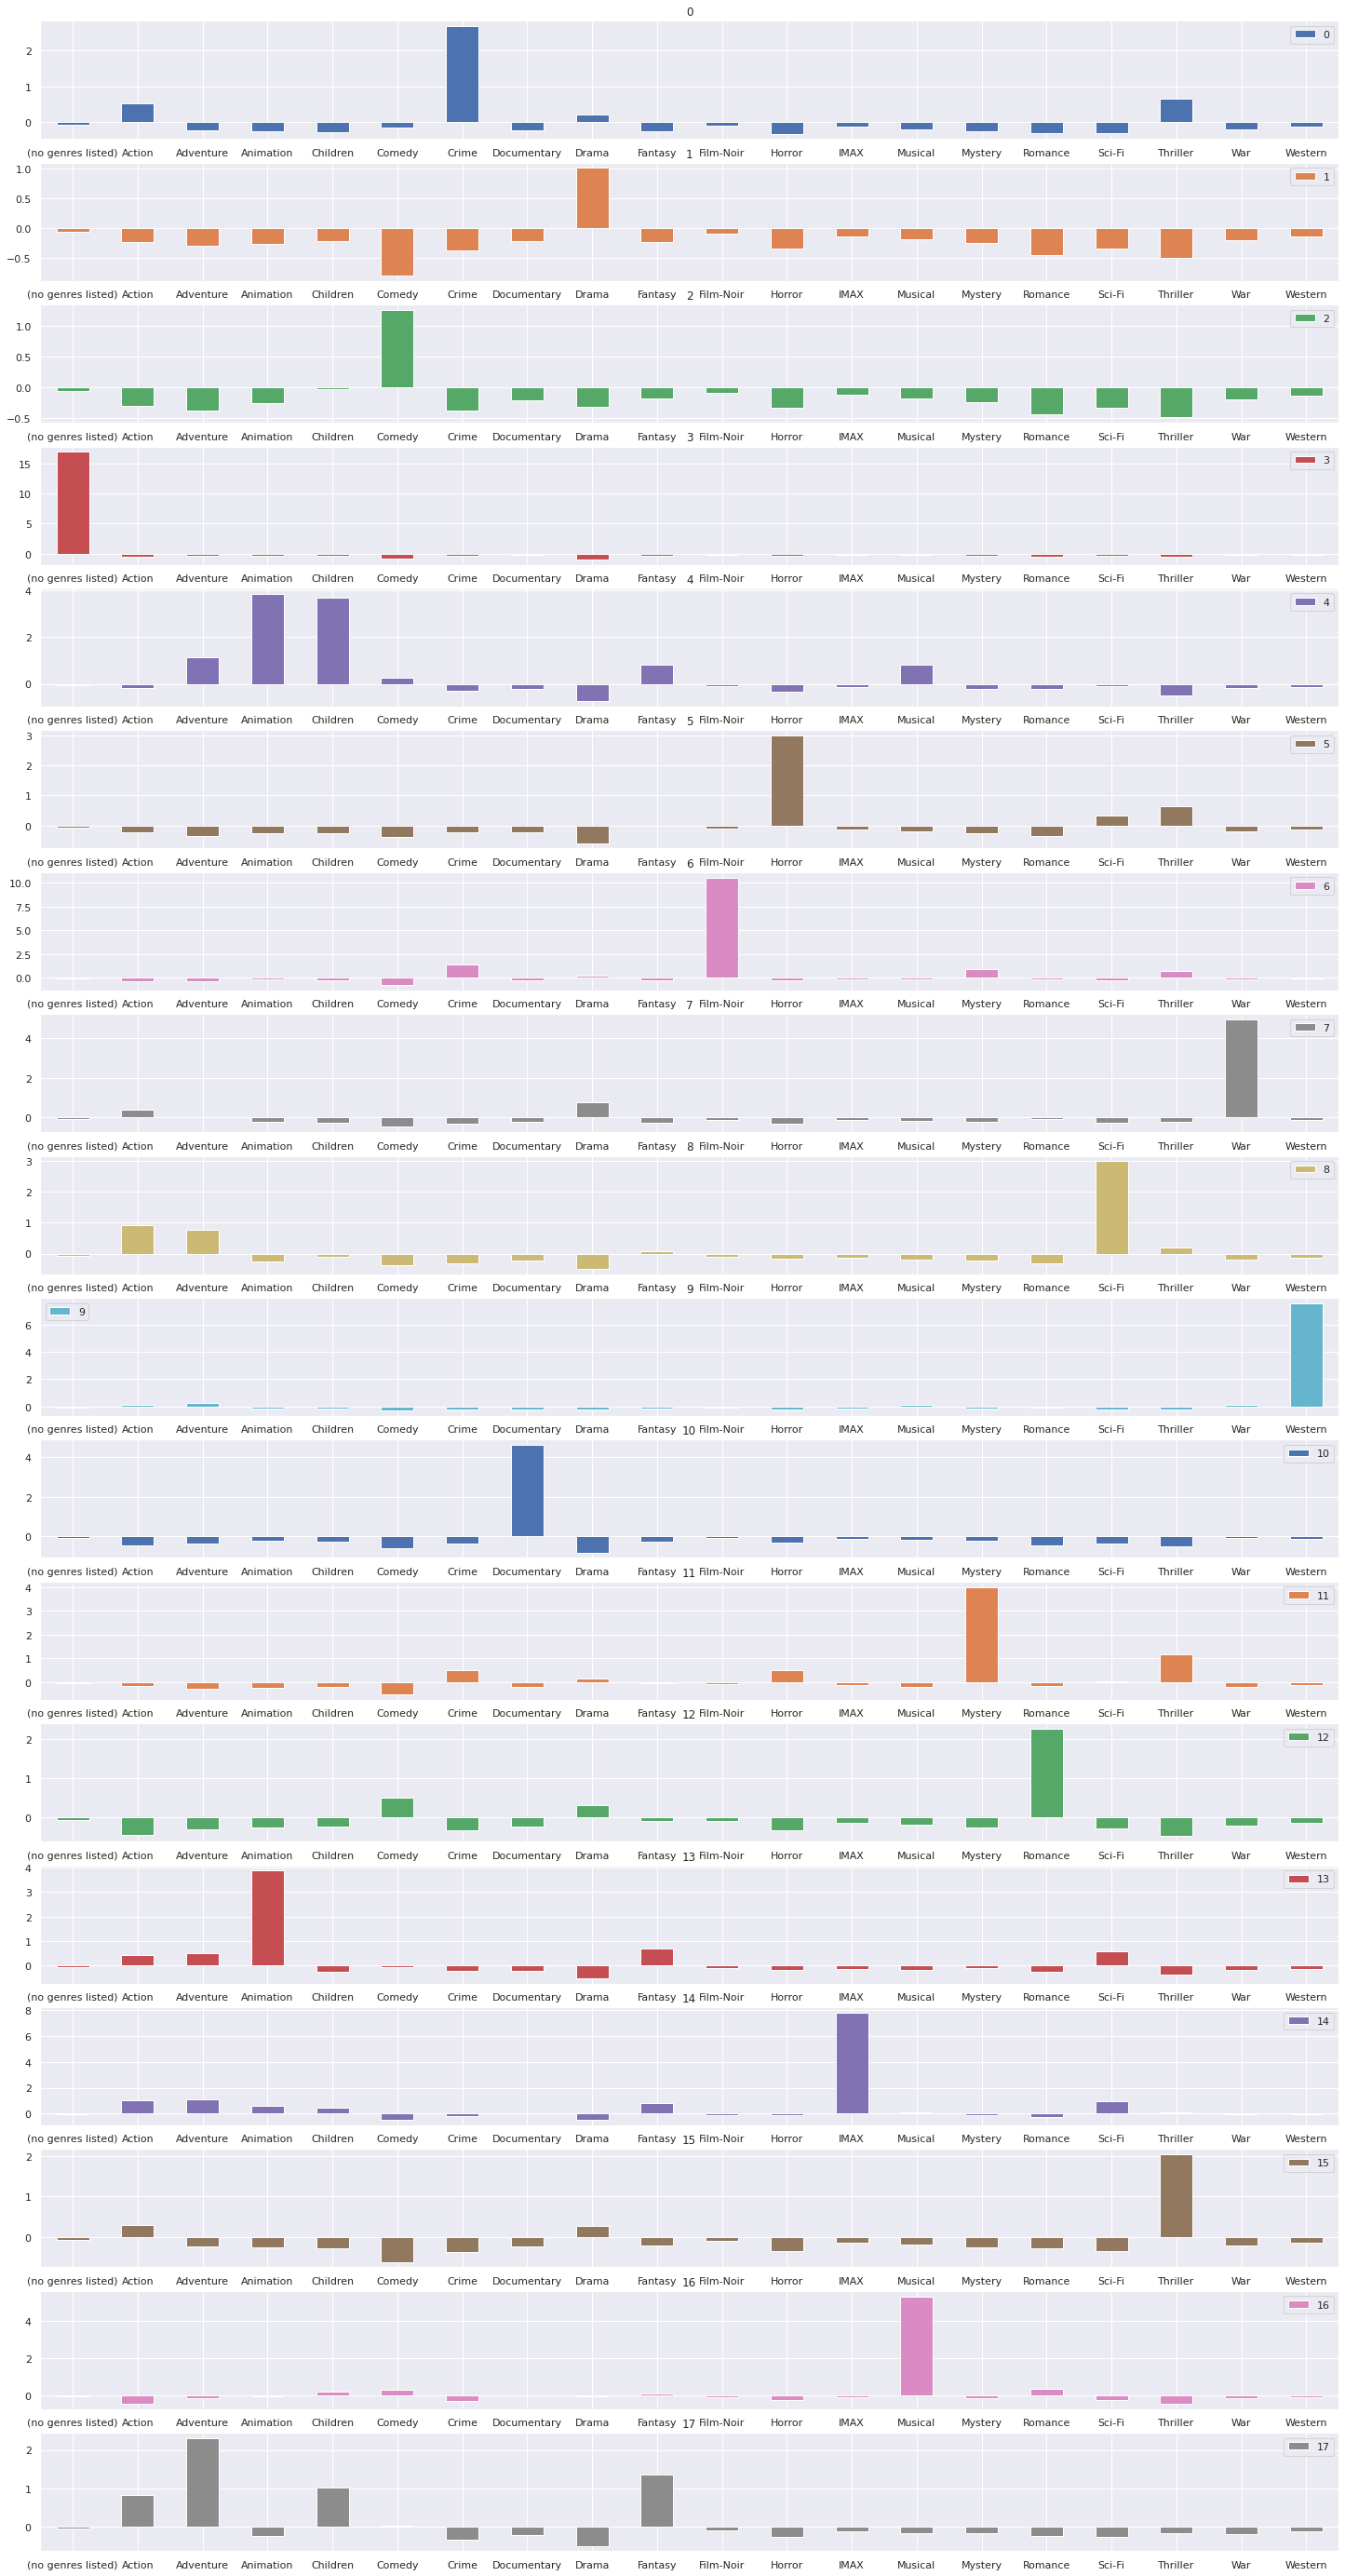

In [18]:
modelo = KMeans(n_clusters=18)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

In [19]:
grupo = 16

filtro = modelo.labels_ == grupo

dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
725,945,Top Hat (1935),Comedy|Musical|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
1424,1947,West Side Story (1961),Drama|Musical|Romance,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
6463,52579,"Vie en Rose, La (Môme, La) (2007)",Drama|Musical,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
5542,26630,Moonwalker (1988),Musical,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6067,40946,Sarah Silverman: Jesus Is Magic (2005),Comedy|Musical,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
7990,96832,Holy Motors (2012),Drama|Fantasy|Musical|Mystery|Sci-Fi,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0
4848,7247,Chitty Chitty Bang Bang (1968),Adventure|Children|Comedy|Fantasy|Musical,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0
4349,6357,High Society (1956),Comedy|Musical|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
7094,70334,Hannah Montana: The Movie (2009),Comedy|Drama|Musical|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
2784,3725,American Pop (1981),Animation|Musical,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [20]:
from sklearn.cluster import AgglomerativeClustering

In [21]:
modelo = AgglomerativeClustering(n_clusters=18)
grupos = modelo.fit_predict(generos_escalados)

In [22]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

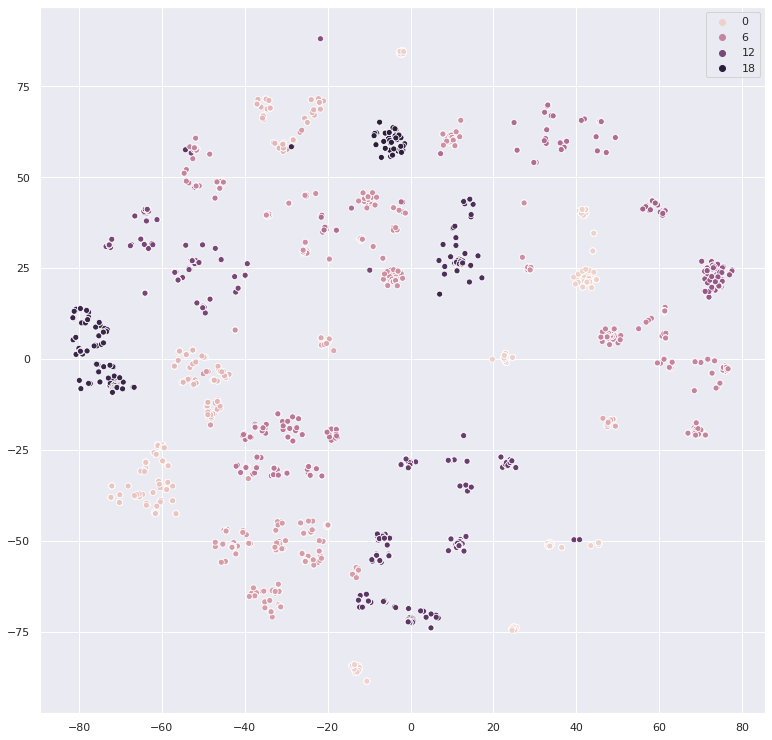

In [23]:
sns.scatterplot(x=visualizacao[:, 0],
               y=visualizacao[:, 1],
               hue=grupos)

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1b7d857ac8>,
      dtype=object)

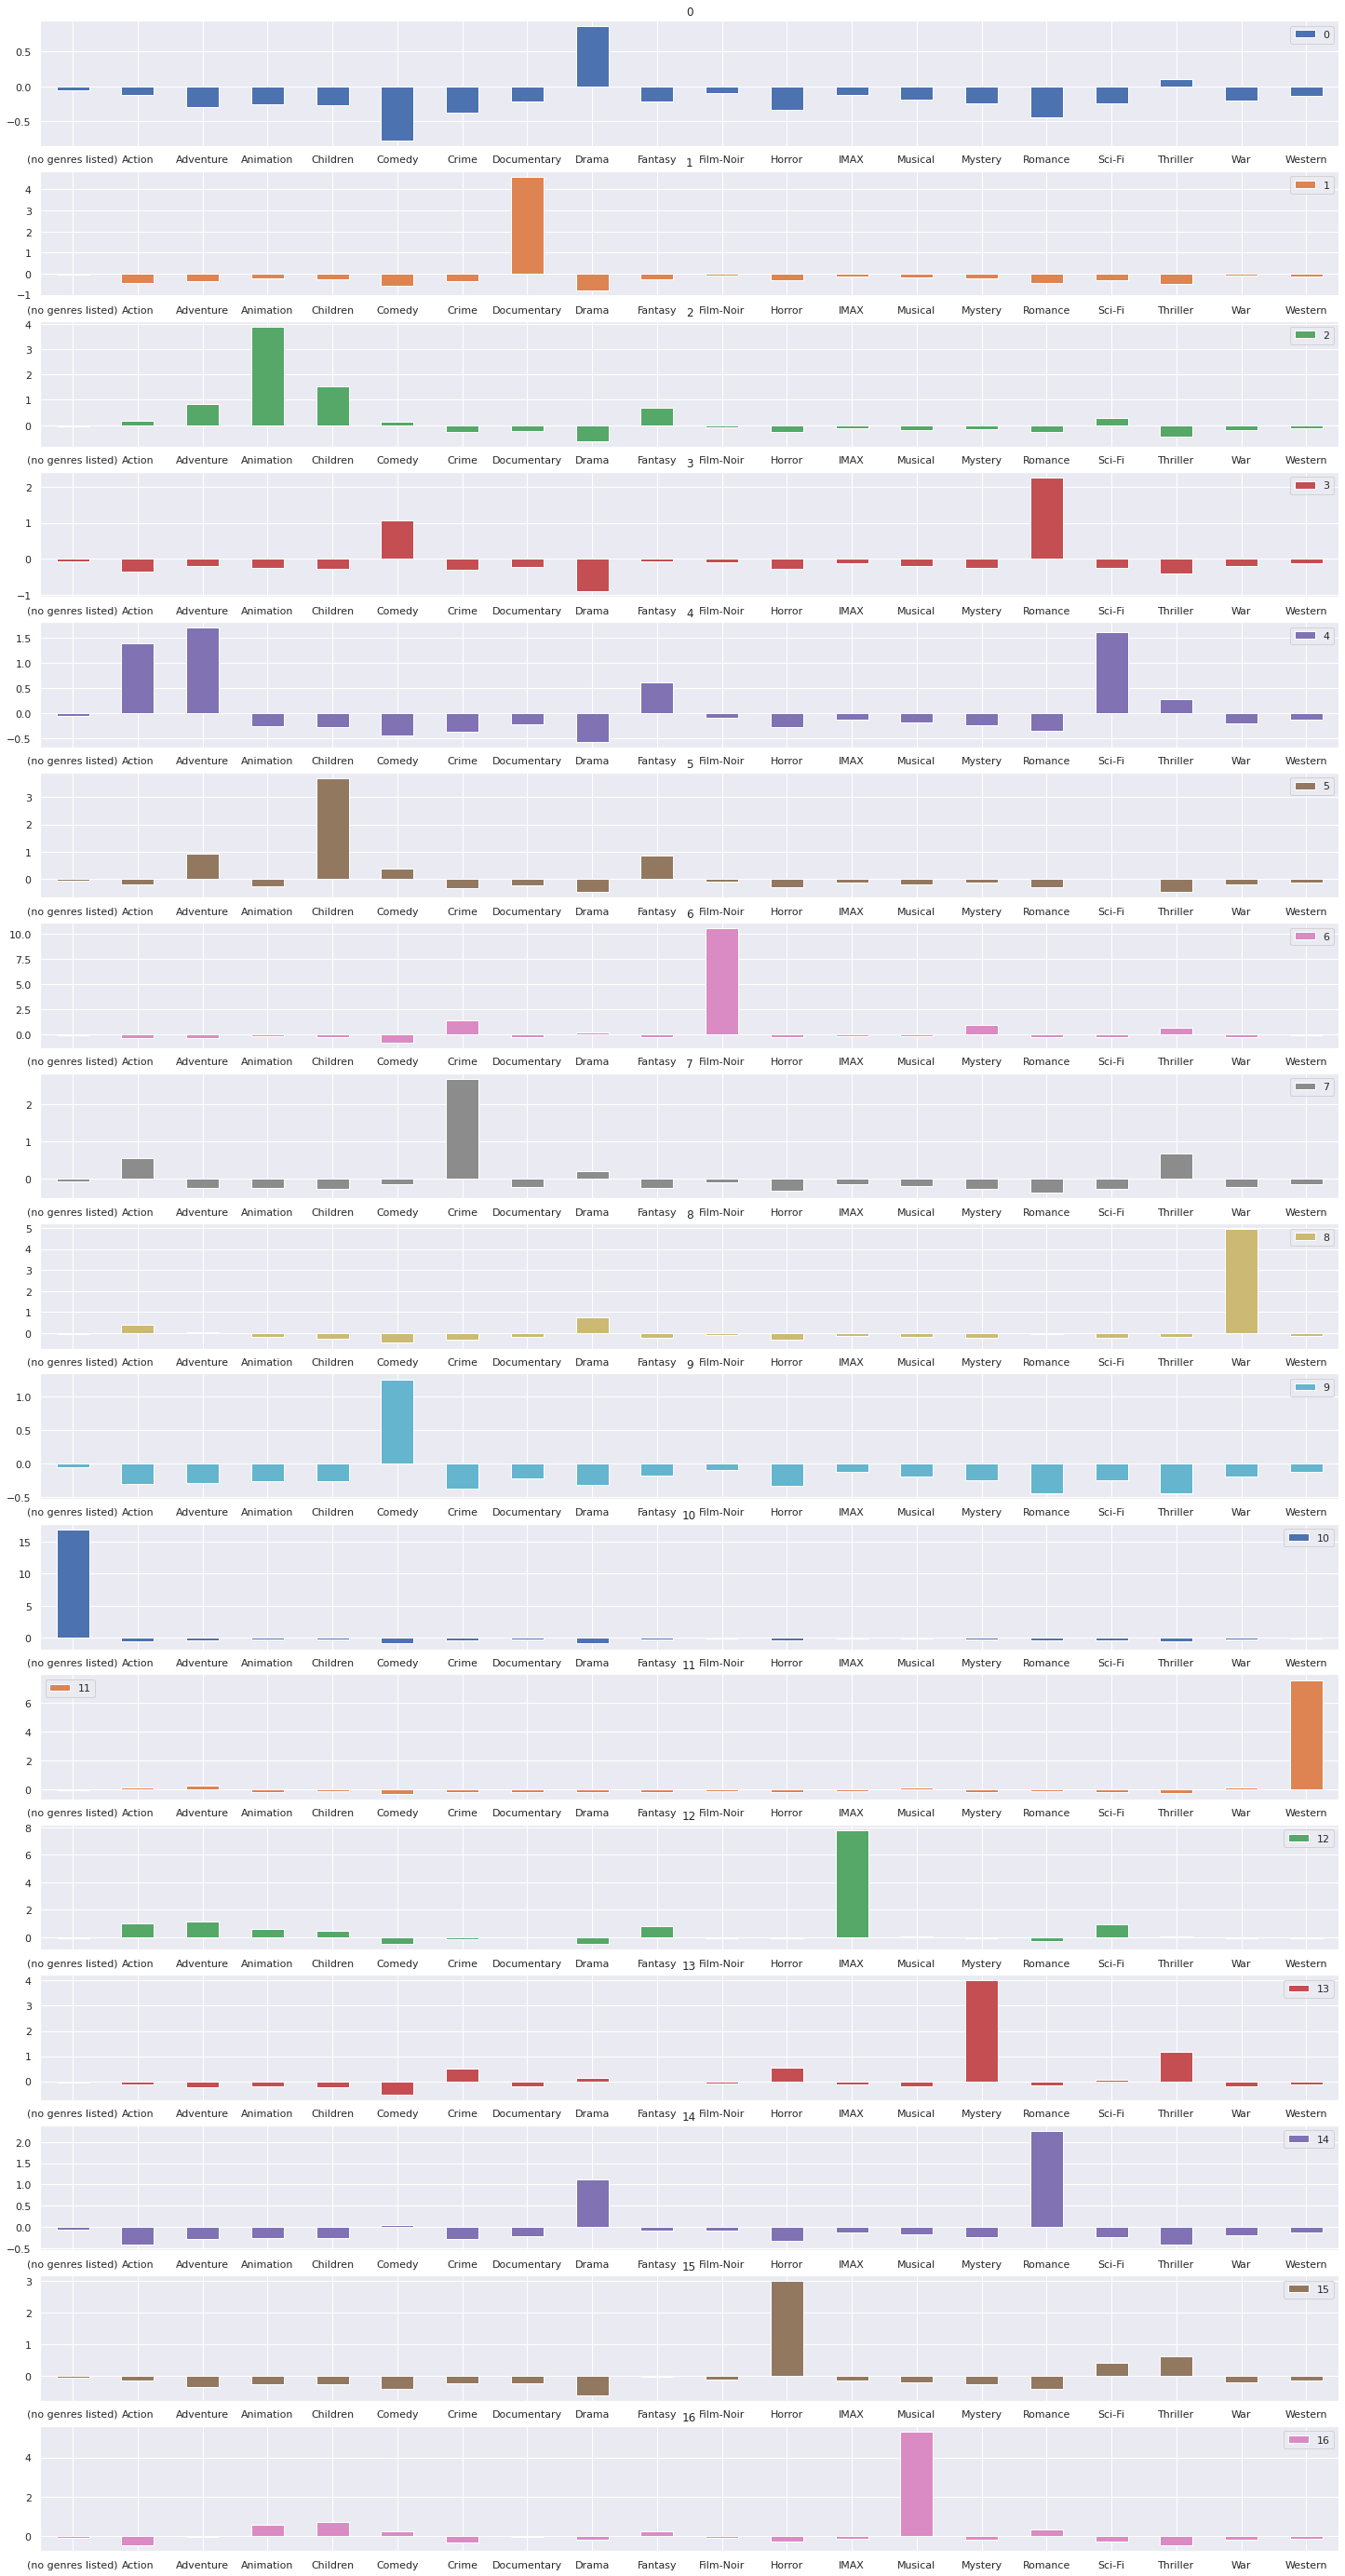

In [25]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_,
            columns=generos.columns)

grupos.transpose().plot.bar(subplots=True,
               figsize=(25, 50),
               sharex=False,
               rot=0)

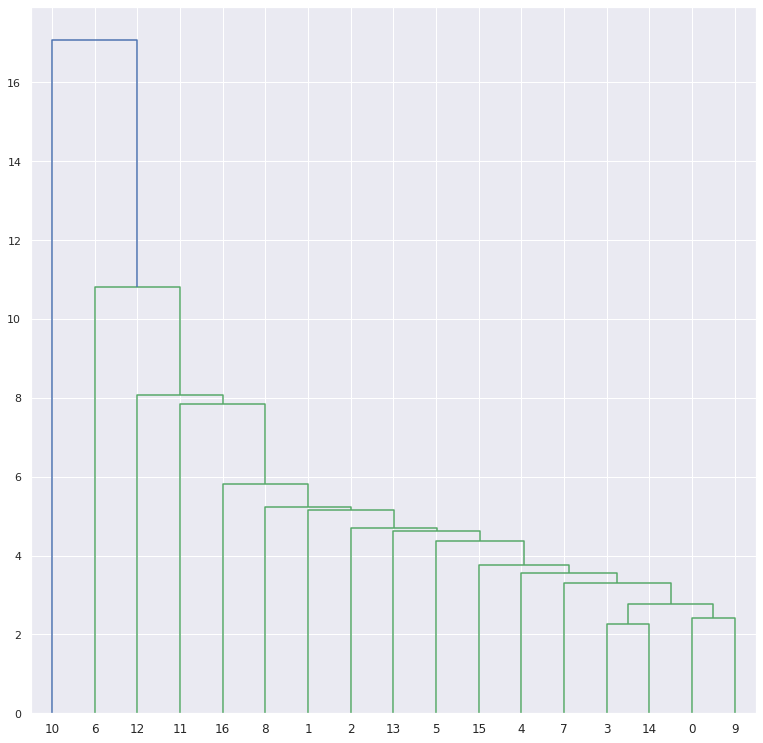

In [26]:
matriz_de_distancia = linkage(grupos)

dendrograma = dendrogram(matriz_de_distancia)